# Learning about the Demograph of the data for the project

The data for the project was taken from SensSmartTech Database on Physionet. 
It is polycardiograph of the cardiovascular signals measured synchronously. It consist of Electrocardiograph, phonocardiograph, photoplethysmography and accelerometer. It is consist of 338 30 seconds recordings from 32 healthy volunteers. 



It is made of 10 channels;
 1. 4 ECG ( limb, V3, V4 leads)
 2. 1 PCG (measured at the heart apex)
 3. 4 PPG
 4. 1 ACC ( accelerometer)


 Several multisensory databases capturing variations in HR during activity have been documented [5-8]. SensSmartTech stands out as the first base of multisensory recordings which systematically follows heart relaxation dynamics across a wide range of HRs (58 bpm - 173 bpm). The recorded HR-dependence is of interest to clinicians applying the HR biomarker correction, engineers investigating HR estimation by different wearable sensors and the impact of noises and artefacts on diagnostic signals, and scientist studying the underlying nonlinear dynamics of the heart as an electro-mechanical system.

 

Of interest to us is the  4 Channel ECG , 1 PCG and 1 ACC counting as 6 channels for the project work.

### **Technicalities of the hardware used for taking the data.**

1. ECG signal acquisition is performed with the ADS1298 chip (Texas Instruments) with the sampling rate set to 500 Hz. Measurement used 4 limb electrodes, V3 and V4, while the redundant precordial electrodes (V1, V2, V5 and V6) were placed on the upper right arm to prevent noise from the hanging leads
    
2. PCG signal is captured using a microphone ICS-40300 (TDK InvenSense) placed in a cardiology stethoscope SPIRIT CK-S474SPF63 (Spirit Medical) with the sampling rate of 1 kHz. 1 PCG stethoscope was positioned at the sternum to the right of V3 ECG electrode and secured with an elastic band
    
3. ACC signal was recorded by a MEMS accelerometer MPU6050 (TDK InvenSense) with an acceleration range set to +/- 1g. It was attached to the body between V3 and V4 ECG electrodes using a self-adhesive ECG electrode. Only the z axis in the direction perpendicular to the chest was used

 4. Sensors output signals were digitalized by 16 bit A/D converters. The polycardiograph synchronously collected data form the sensors and transmitted them to a PC over Ethernet. Accuracy of the Polycardiograph was set by the sampling rate of the sensors.


**Relevant information concerning mode of data collection**: Recordings were taken in a standing position at rest and immediately after the activity.
After each recording, the researcher calculated the heart rate (HR). Three 30-second recordings were made at rest. After the activity, recordings were repeated until the HR dropped to 10-20 bpm above the HR at rest.

Of interest to us is the CSV format which has column for time, and the rest of the channels associated with it.  The **acquisition time follows the sampling rate of the sensor**. Sensors may record signals at different point in time.
 Therefore, the time axes of different sensors are different, but the **acquisition is synchronized so that they can be extended to a common zero.**
 



Additionally, a table Demographics.csv lists file names and subject demographics, including age, height, weight, and body-mass index. Furthermore, each row in this table displays the subject activity status: 'B' for the measurement before and 'A' for the measurement after the activity, and the HR calculated as the inverse of the median RR interval per recording.
To de-identify the data, all dates were removed from the recordings. The published data do not contain any information that identifies or provides a reasonable basis to identify an individual. The data comply with HIPPA requirements for sharing personal health information.

### **Understanding the Demographics**

In [38]:
# Loading the necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns



In [39]:
df = pd.read_csv('Demographics_Cleaned.csv', )
# Display the first few rows of the DataFrame to understand its structure
df.head()

,File Number,Subject number,Recording time (hh:mm:ss),Gender,Age (year),Height (cm),Weight (kg),Body-mass index,ECG,PPG,PCG,ACC,Before (B) / after (A) activity,Median heart rate (bpm)
0,1.0,1.0,10:09:54,M,53.0,175.0,88.0,28.73,1_10-09-54_ecg,1_10-09-54_ppg,1_10-09-54_pcg,1_10-09-54_acc,B,91.2
1,2.0,1.0,10:11:48,M,53.0,175.0,88.0,28.73,1_10-11-48_ecg,1_10-11-48_ppg,1_10-11-48_pcg,1_10-11-48_acc,B,90.1
2,3.0,1.0,10:12:41,M,53.0,175.0,88.0,28.73,1_10-12-41_ecg,1_10-12-41_ppg,1_10-12-41_pcg,1_10-12-41_acc,B,92.9
3,4.0,1.0,10:25:13,M,53.0,175.0,88.0,28.73,1_10-25-13_ecg,1_10-25-13_ppg,1_10-25-13_pcg,1_10-25-13_acc,A,129.9
4,5.0,1.0,10:26:08,M,53.0,175.0,88.0,28.73,1_10-26-08_ecg,1_10-26-08_ppg,1_10-26-08_pcg,1_10-26-08_acc,A,120.0


In [40]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
df.info()

Missing values in each column:
 File Number                         63
Subject number                      63
Recording time (hh:mm:ss)           63
Gender                              63
Age (year)                          63
Height (cm)                         63
Weight (kg)                         63
Body-mass index                     63
ECG                                 63
PPG                                 63
PCG                                 63
ACC                                 63
Before (B)  / after (A) activity    63
Median heart rate (bpm)             63
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   File Number                       338 non-null    float64
 1   Subject number                    338 non-null    float64
 2   Recording time (hh:mm:ss)         338 non-null 

In [41]:
# Convert 'Recording time' string to datetime.time object
# Assuming 'Recording time (hh:mm:ss)' is the column with time strings

# Function to safely convert time strings to datetime.time objects
def parse_time(val):
    if pd.isna(val):
        return None
    try:
        return datetime.strptime(str(val).strip(), "%H:%M:%S").time()
    except ValueError:
        print(f"Skipping invalid time format: {val}")
        return None

# Apply the conversion
df["Recording time"] = df["Recording time (hh:mm:ss)"].apply(parse_time)

In [42]:
# Group by Subject number and sort within each group by File number
grouped = df.groupby("Subject number")

# Create a dictionary where key = Subject number, value = DataFrame of that subject's records
subject_batches = {
    subject: group.sort_values(by="File Number").reset_index(drop=True)
    for subject, group in grouped
}

# Display the first few rows of the DataFrame for a specific subject (e.g., Subject 1)
subject_batches[1].head(10)

,File Number,Subject number,Recording time (hh:mm:ss),Gender,Age (year),Height (cm),Weight (kg),Body-mass index,ECG,PPG,PCG,ACC,Before (B) / after (A) activity,Median heart rate (bpm),Recording time
0,1.0,1.0,10:09:54,M,53.0,175.0,88.0,28.73,1_10-09-54_ecg,1_10-09-54_ppg,1_10-09-54_pcg,1_10-09-54_acc,B,91.2,10:09:54
1,2.0,1.0,10:11:48,M,53.0,175.0,88.0,28.73,1_10-11-48_ecg,1_10-11-48_ppg,1_10-11-48_pcg,1_10-11-48_acc,B,90.1,10:11:48
2,3.0,1.0,10:12:41,M,53.0,175.0,88.0,28.73,1_10-12-41_ecg,1_10-12-41_ppg,1_10-12-41_pcg,1_10-12-41_acc,B,92.9,10:12:41
3,4.0,1.0,10:25:13,M,53.0,175.0,88.0,28.73,1_10-25-13_ecg,1_10-25-13_ppg,1_10-25-13_pcg,1_10-25-13_acc,A,129.9,10:25:13
4,5.0,1.0,10:26:08,M,53.0,175.0,88.0,28.73,1_10-26-08_ecg,1_10-26-08_ppg,1_10-26-08_pcg,1_10-26-08_acc,A,120.0,10:26:08
5,6.0,1.0,10:26:55,M,53.0,175.0,88.0,28.73,1_10-26-55_ecg,1_10-26-55_ppg,1_10-26-55_pcg,1_10-26-55_acc,A,112.8,10:26:55
6,7.0,1.0,10:27:42,M,53.0,175.0,88.0,28.73,1_10-27-42_ecg,1_10-27-42_ppg,1_10-27-42_pcg,1_10-27-42_acc,A,111.1,10:27:42
7,8.0,1.0,10:29:01,M,53.0,175.0,88.0,28.73,1_10-29-01_ecg,1_10-29-01_ppg,1_10-29-01_pcg,1_10-29-01_acc,A,110.3,10:29:01
8,9.0,1.0,10:31:08,M,53.0,175.0,88.0,28.73,1_10-31-08_ecg,1_10-31-08_ppg,1_10-31-08_pcg,1_10-31-08_acc,A,113.2,10:31:08
9,10.0,1.0,10:32:38,M,53.0,175.0,88.0,28.73,1_10-32-38_ecg,1_10-32-38_ppg,1_10-32-38_pcg,1_10-32-38_acc,A,104.9,10:32:38


In [43]:
# Creating the duration DataFrame
# Drop rows with NaN in 'Recording time' to avoid issues in calculations

df_clean = df.dropna(subset=["Recording time"])

# Group by Subject
subject_groups = df_clean.groupby("Subject number")

# Prepare results
duration_data = []

for subject, group in subject_groups:
    group_sorted = group.sort_values("File Number")

    start_time = group_sorted["Recording time"].iloc[0]
    end_time = group_sorted["Recording time"].iloc[-1]

    # Convert times to datetime so we can subtract
    start_dt = datetime.combine(datetime.today(), start_time)
    end_dt = datetime.combine(datetime.today(), end_time)

    # Handle potential midnight wraparound (if needed)
    if end_dt < start_dt:
        end_dt += timedelta(days=1)

    duration = end_dt - start_dt

    duration_data.append({
        "Subject number": subject,
        "Start time": start_time,
        "End time": end_time,
        "Duration (HH:MM:SS)": duration
    })

# Create a new DataFrame with the results
duration_df = pd.DataFrame(duration_data)
duration_df


,Subject number,Start time,End time,Duration (HH:MM:SS)
0,1.0,10:09:54,10:32:38,0 days 00:22:44
1,2.0,14:08:15,14:35:20,0 days 00:27:05
2,3.0,10:08:25,10:23:07,0 days 00:14:42
3,4.0,11:19:22,11:29:07,0 days 00:09:45
4,5.0,08:59:04,09:14:32,0 days 00:15:28
5,6.0,10:43:42,11:26:54,0 days 00:43:12
6,7.0,14:16:33,14:29:51,0 days 00:13:18
7,8.0,12:52:50,13:21:39,0 days 00:28:49
8,9.0,13:52:23,14:10:21,0 days 00:17:58
9,10.0,18:12:33,18:34:40,0 days 00:22:07


In [44]:
#Trying to group the data according to the before and after activity (A and B) and calculate the duration of each activity.

# Clean the activity column (strip whitespace and uppercase)
df["Activity"] = df["Before (B)  / after (A) activity"].astype(str).str.strip().str.upper()

# Drop rows with missing info
df_clean = df.dropna(subset=["Recording time", "Activity"])

# Prepare results
results = []

for subject, group in df_clean.groupby("Subject number"):
    subject_data = {"Subject number": subject}

    for label in ['A', 'B']:  # A = After, B = Before
        sub = group[group["Activity"] == label]

        if sub.empty:
            subject_data[f"{label} Start"] = None
            subject_data[f"{label} End"] = None
            subject_data[f"{label} Duration"] = None
            continue

        sub_sorted = sub.sort_values("File Number")

        start_time = sub_sorted["Recording time"].iloc[0]
        end_time = sub_sorted["Recording time"].iloc[-1]

        start_dt = datetime.combine(datetime.today(), start_time)
        end_dt = datetime.combine(datetime.today(), end_time)

        if end_dt < start_dt:
            end_dt += timedelta(days=1)

        duration = end_dt - start_dt

        subject_data[f"{label} Start"] = start_time
        subject_data[f"{label} End"] = end_time
        subject_data[f"{label} Duration"] = duration

    # Optional: add total duration
    if subject_data["A Duration"] and subject_data["B Duration"]:
        subject_data["Total Duration"] = subject_data["A Duration"] + subject_data["B Duration"]
    else:
        subject_data["Total Duration"] = None

    results.append(subject_data)

# Create results DataFrame
activity_duration_df = pd.DataFrame(results)
activity_duration_df


,Subject number,A Start,A End,A Duration,B Start,B End,B Duration,Total Duration
0,1.0,10:25:13,10:32:38,0 days 00:07:25,10:09:54,10:12:41,0 days 00:02:47,0 days 00:10:12
1,2.0,14:18:27,14:35:20,0 days 00:16:53,14:08:15,14:09:54,0 days 00:01:39,0 days 00:18:32
2,3.0,10:21:32,10:23:07,0 days 00:01:35,10:08:25,10:10:05,0 days 00:01:40,0 days 00:03:15
3,4.0,11:27:30,11:29:07,0 days 00:01:37,11:19:22,11:21:22,0 days 00:02:00,0 days 00:03:37
4,5.0,09:07:48,09:14:32,0 days 00:06:44,08:59:04,09:01:18,0 days 00:02:14,0 days 00:08:58
5,6.0,10:52:15,11:26:54,0 days 00:34:39,10:43:42,10:46:25,0 days 00:02:43,0 days 00:37:22
6,7.0,14:23:04,14:29:51,0 days 00:06:47,14:16:33,14:18:43,0 days 00:02:10,0 days 00:08:57
7,8.0,13:04:53,13:21:39,0 days 00:16:46,12:52:50,12:54:24,0 days 00:01:34,0 days 00:18:20
8,9.0,14:02:00,14:10:21,0 days 00:08:21,13:52:23,13:53:57,0 days 00:01:34,0 days 00:09:55
9,10.0,18:22:29,18:34:40,0 days 00:12:11,18:12:33,18:14:33,0 days 00:02:00,0 days 00:14:11


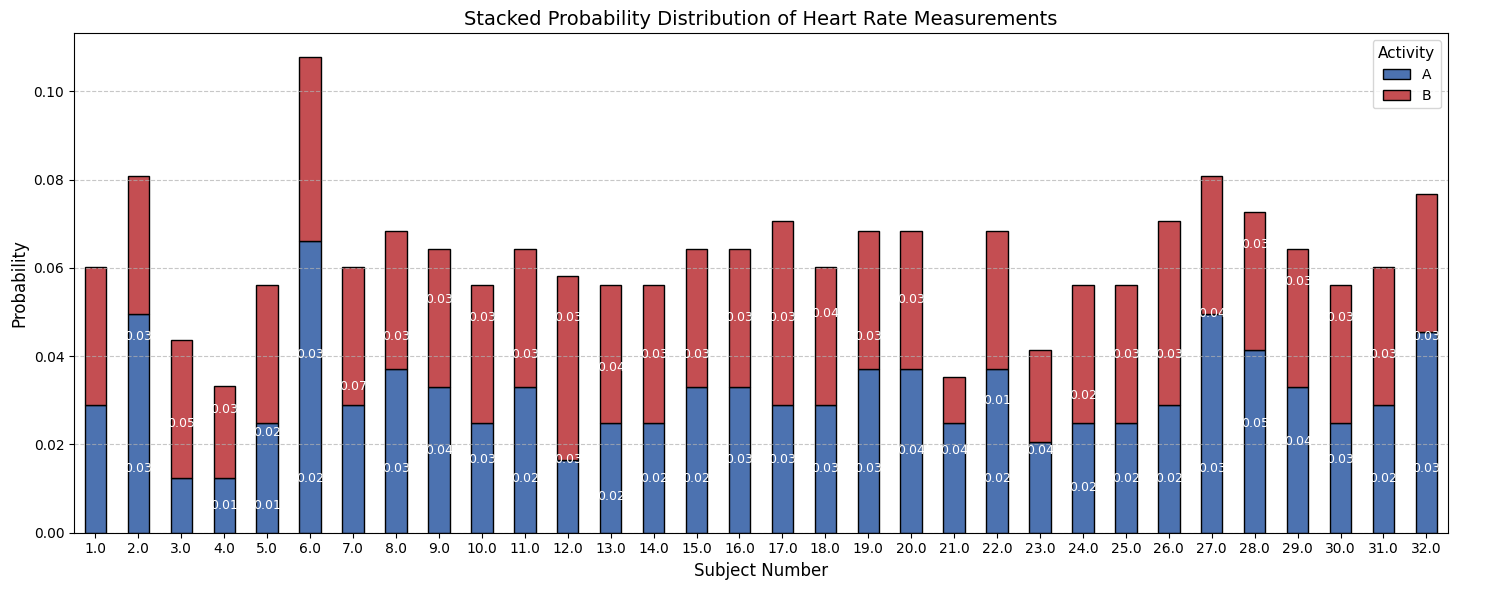

In [45]:
# Finding the distribution of the each activity with a subject and finding the distribution of the activity finding for with
# Heart Rate under each subject number.
heart_rate_distr = df.groupby(["Subject number","Before (B)  / after (A) activity"])["Median heart rate (bpm)"].describe()

# Step 2: Extract count and mean into a new DataFrame
heart_rate_stats = heart_rate_distr[["count", "mean"]].reset_index()

# Step 3: Compute total counts for each condition (A/B)
total_counts = heart_rate_stats.groupby("Before (B)  / after (A) activity")["count"].sum().to_dict()

# Step 4: Compute probabilities for each entry
heart_rate_stats["Probability"] = heart_rate_stats.apply(
    lambda row: row["count"] / total_counts[row["Before (B)  / after (A) activity"]],
    axis=1
)

# Step 5: Sort for clarity
heart_rate_stats = heart_rate_stats.sort_values(["Before (B)  / after (A) activity", "Subject number"])

# # View the structured result
# print(heart_rate_stats)

# # Step 6: Optional Visualization
# plt.figure(figsize=(10, 6))
# sns.barplot(
#     data=heart_rate_stats,
#     x="Subject number",
#     y="Probability",
#     hue="Before (B)  / after (A) activity",
#     palette="coolwarm"
# )
# plt.title("Probability Distribution of Heart Rate Measurements by Condition")
# plt.ylabel("Probability")
# plt.xlabel("Subject Number")
# plt.tight_layout()
# plt.show()

pivot_df = heart_rate_stats.pivot(index="Subject number", 
                                   columns="Before (B)  / after (A) activity", 
                                   values="Probability").fillna(0)

# Set colors suitable for academic presentation
colors = {
    'A': '#4C72B0',  # muted blue
    'B': '#C44E52'   # muted red
}

# Plot
ax = pivot_df.plot(
    kind='bar',
    stacked=True,
    color=[colors.get(col) for col in pivot_df.columns],
    figsize=(15, 6),
    edgecolor='black'
)

# Title and labels
plt.title("Stacked Probability Distribution of Heart Rate Measurements", fontsize=14)
plt.xlabel("Subject Number", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Activity", title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for idx, row in pivot_df.iterrows():
    cumulative = 0
    for activity in pivot_df.columns:
        height = row[activity]
        if height > 0:
            ax.text(idx, cumulative + height / 2, f"{height:.2f}", ha='center', va='center', fontsize=9, color='white')
            cumulative += height

plt.tight_layout()
plt.show()

In [46]:
total_counts

{'A': 242.0, 'B': 96.0}

In [47]:
subject_info = df[["Subject number","Age (year)","Height (cm)","Weight (kg)","Body-mass index"]]

# Drop duplicates so each subject appears only once
unique_subject_info = subject_info.drop_duplicates(subset=["Subject number"])

# (Optional) Set subject as index
unique_subject_info.set_index("Subject number", inplace=True)
unique_subject_info

,Age (year),Height (cm),Weight (kg),Body-mass index
Subject number,,,,
1.0,53.0,175.0,88.0,28.73
2.0,27.0,169.0,63.0,22.06
3.0,25.0,189.0,101.0,28.27
4.0,31.0,200.0,113.0,28.25
5.0,44.0,167.0,64.0,22.95
6.0,37.0,170.0,86.0,29.76
7.0,33.0,160.0,54.0,21.09
8.0,44.0,181.0,78.0,23.81
9.0,28.0,167.0,60.0,21.51


In [48]:
new_df = unique_subject_info.join(duration_df.set_index("Subject number"), on="Subject number", how="inner")
mean_series = heart_rate_distr["mean"]
mean_df = mean_series.unstack("Before (B)  / after (A) activity")
mean_df = mean_df.reset_index()
mean_df.columns = ['Subject number', 'heart_rate_Before', 'heart_rate_After']
new_df = new_df.join(mean_df.set_index("Subject number"), on="Subject number", how="left")
new_df

,Age (year),Height (cm),Weight (kg),Body-mass index,Start time,End time,Duration (HH:MM:SS),heart_rate_Before,heart_rate_After
Subject number,,,,,,,,,
1.0,53.0,175.0,88.0,28.73,10:09:54,10:32:38,0 days 00:22:44,114.600000,91.400000
2.0,27.0,169.0,63.0,22.06,14:08:15,14:35:20,0 days 00:27:05,116.441667,86.000000
3.0,25.0,189.0,101.0,28.27,10:08:25,10:23:07,0 days 00:14:42,110.566667,95.400000
4.0,31.0,200.0,113.0,28.25,11:19:22,11:29:07,0 days 00:09:45,107.000000,66.550000
5.0,44.0,167.0,64.0,22.95,08:59:04,09:14:32,0 days 00:15:28,130.616667,94.300000
6.0,37.0,170.0,86.0,29.76,10:43:42,11:26:54,0 days 00:43:12,113.781250,82.850000
7.0,33.0,160.0,54.0,21.09,14:16:33,14:29:51,0 days 00:13:18,106.542857,74.966667
8.0,44.0,181.0,78.0,23.81,12:52:50,13:21:39,0 days 00:28:49,113.744444,90.400000
9.0,28.0,167.0,60.0,21.51,13:52:23,14:10:21,0 days 00:17:58,102.650000,75.833333


In [49]:
# new_df.to_csv("Final_Demographics.csv", index=False)

# I have had my fair share of challenges with the code, but I have tried to make it as clean as possible.
# I have also tried to make the code as efficient as possible. I have used functions and loops where necessary to avoid redundancy.
# I have also used pandas and numpy to handle the data efficiently. I have used groupby and apply functions to manipulate the data.

### Univariate Analysis

This analysis is done on the demographics of the volunteers. The goal is to understand their Age, height, weight and body mass index and also find the relationship that exist with their value and how each may affect the computations.


#### Diving deep into the data of the individual
Before diving into the data of the volunteer. The univariate analysis is done to understand how each variable affect the work.
The next is to find the relationship of such values with the Heart Rate recorded at separate times ( Before and After activity)
The recording of each person is done with respect to before and after activity. The idea is take each record and find their statistical values for further analysis.
We do that by;

1. Take a sample of the recorded data and find all the necessary statistics and distribution on the signal


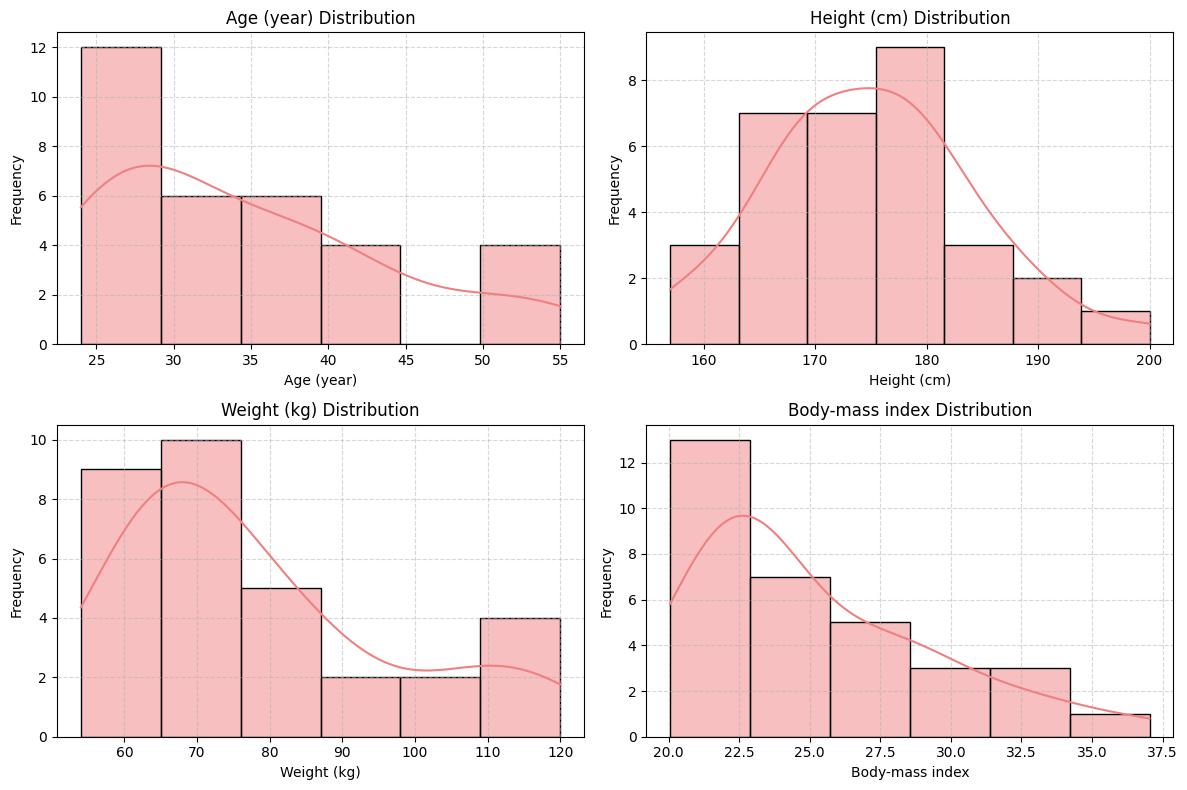

In [50]:
columns_to_plot = [
    "Age (year)",
    "Height (cm)",
    "Weight (kg)",
    "Body-mass index"
]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(unique_subject_info[col], kde=True, ax=axs[i], color="lightcoral", edgecolor="black")
    axs[i].set_title(f"{col} Distribution")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")
    axs[i].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()
